### Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data into the dataframe

In [2]:
#reading data into the df dataframe
df = pd.read_csv(r"C:\Users\ROG\Downloads\Test_data.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [3]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Data Cleaning

In [4]:
#renaming some of the column names
df.rename(columns={'department':'employee_work_department','region':'employee_region','education':'employee_education_level','gender':'employee_gender','recruitment_channel':'employee_recruitment_channel','no_of_trainings':'no_of_trainings_of_employee','age':'employee_age','previous_year_rating':'employee_previous_year_rating','length_of_service':'employee_length_of_service','KPIs_met >80%':'employee_met_KPI > 80%','awards_won?':'employee_awards_won','avg_training_score':'employee_avg_training_score'}, inplace=True)
df.head()

,employee_id,employee_work_department,employee_region,employee_education_level,employee_gender,employee_recruitment_channel,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_length_of_service,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
#checking to see if any column contains null values
df.isnull().sum()

employee_id                         0
employee_work_department            0
employee_region                     0
employee_education_level         1034
employee_gender                     0
employee_recruitment_channel        0
no_of_trainings_of_employee         0
employee_age                        0
employee_previous_year_rating    1812
employee_length_of_service          0
employee_met_KPI > 80%              0
employee_awards_won                 0
employee_avg_training_score         0
dtype: int64

In the columns 'employee_education_level' and 'emplpoyee_previous_year_rating' there are some null values.

##### Variable 1: employee_education_level

In [6]:
education_value_counts=df['employee_education_level'].value_counts()
education_value_counts

employee_education_level
Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: count, dtype: int64

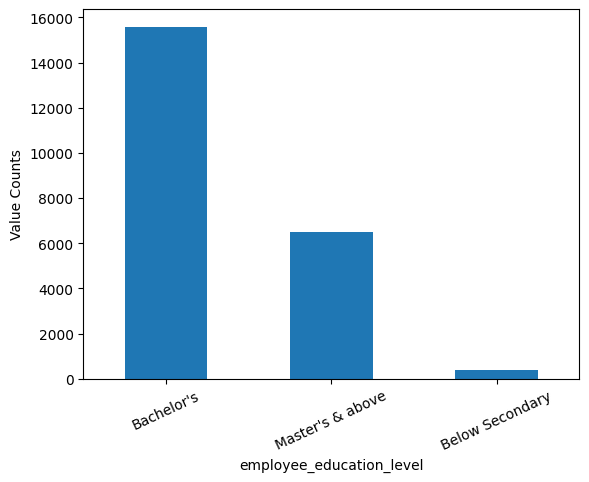

In [7]:
education_value_counts.plot(kind='bar', rot=25)
plt.ylabel('Value Counts')
plt.show()

In [8]:
#Treating null values in 'employee_education_level' variable

#function to replace null values with Others in the variable
def treat_null_in_education(df, col_name):
    df[col_name] = df[col_name].fillna('Others')

treat_null_in_education(df, 'employee_education_level')

To prevent data loss I labeled the null values with 'Others'. At the end of data cleaning, the goal is to retain as much as data as possible.

In [9]:
new_education_value_counts = df['employee_education_level'].value_counts()
new_education_value_counts

employee_education_level
Bachelor's          15578
Master's & above     6504
Others               1034
Below Secondary       374
Name: count, dtype: int64

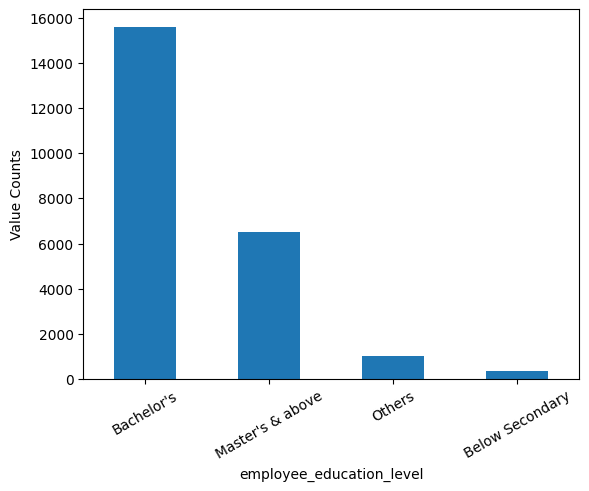

In [10]:
new_education_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

The 'Others' category is now included, which contains a count of the previously missing or null data points in the 'employee_education_level' column.

##### Variable 2: employee_previous_year_rating

In [11]:
#dropping null values from the 'employee_previous_year_rating' column.
df = df.dropna(subset=['employee_previous_year_rating'])

The missing data is not significant enough to bias the results.

In [12]:
rating_value_counts = df['employee_previous_year_rating'].value_counts()

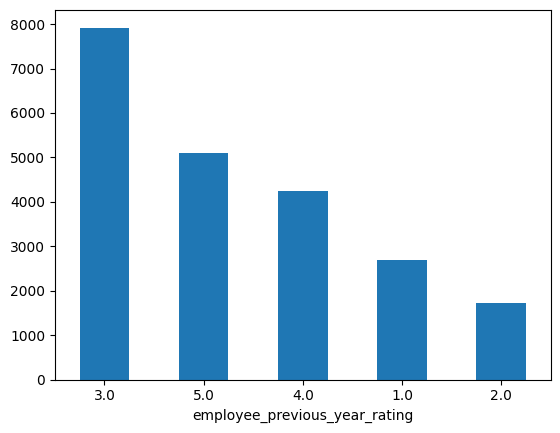

In [13]:
rating_value_counts.plot(kind='bar', rot=0)
plt.show()

- Rating '3.0' has the highest count, suggesting that most employees received a middle-of-the-road performance rating.
- The second most common rating is '5.0', indicating a significant number of employees were rated as high performers.
- Rating '4.0' is slightly less common than '5.0', but still represents a large number of employees.
- Ratings '1.0' and '2.0' are the least common, with '1.0' being the rarest. This could imply that very few employees receive the lowest performance ratings.

- The distribution of ratings suggests a standard performance curve where most employees are considered to be performing at an expected level ('3.0'), with fewer employees recognized as high ('5.0') or above average ('4.0') performers.
- The low occurrence of '1.0' and '2.0' ratings might indicate a lenient rating system, a high overall performance level, or potentially a reluctance to assign low ratings.

In [14]:
#making sure there are no more null values
df.isnull().sum()

employee_id                      0
employee_work_department         0
employee_region                  0
employee_education_level         0
employee_gender                  0
employee_recruitment_channel     0
no_of_trainings_of_employee      0
employee_age                     0
employee_previous_year_rating    0
employee_length_of_service       0
employee_met_KPI > 80%           0
employee_awards_won              0
employee_avg_training_score      0
dtype: int64

After performing data cleaning, there are no more null values present.

### Variable 3: employee_work_department

In [15]:
department_value_counts = df['employee_work_department'].value_counts()

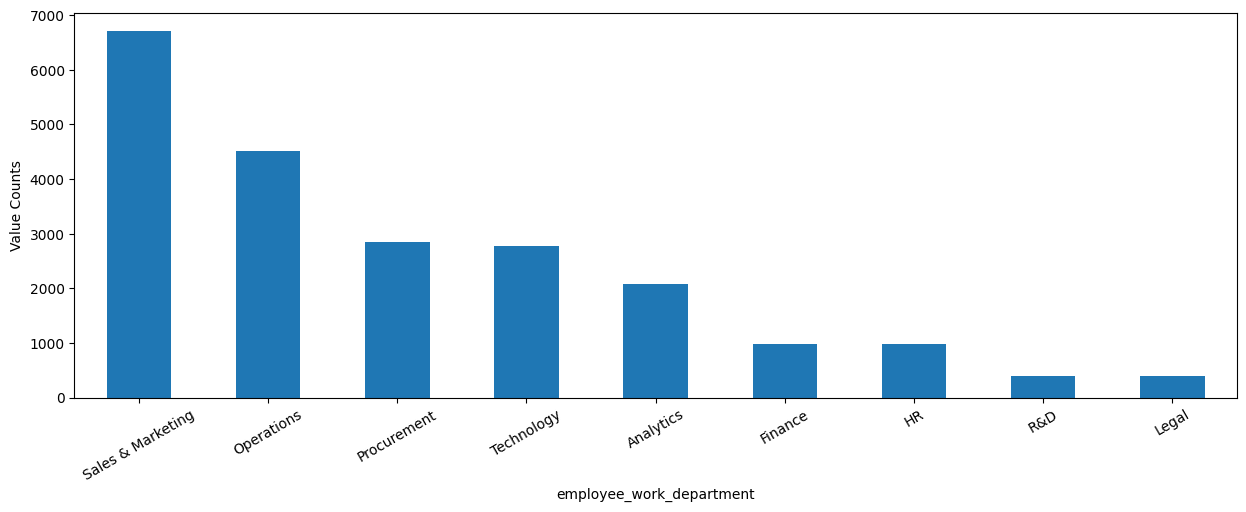

In [16]:
plt.figure(figsize=(15, 5))
department_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

- ' Sales & Marketing' has the highest count, indicating that it is the largest department in terms of employee numbers in this dataset.
- The 'Operations' department follows as the second largest.
- 'Procurement' and 'Technology' have similar counts, suggesting they are smaller but comparably sized departments within the organization.
- 'Analytics', 'Finance', 'HR', 'R&D', and 'Legal' have progressively fewer employees, with 'Legal' being the smallest department.

- The visualization of 'Sales & Marketing' and 'Operations' suggests that these are likely core functions of the business, requiring the most personnel.
- The smaller size of specialized departments like 'R&D' and 'Legal' is typical for many organizations, as these functions may not require as many staff as the more central operational roles.
- Departments such as 'Analytics' and 'Finance' may be support functions that require a moderate number of employees to function effectively across the organization.

### Variable 4: employee_region

In [17]:
region_value_counts = df['employee_region'].value_counts()

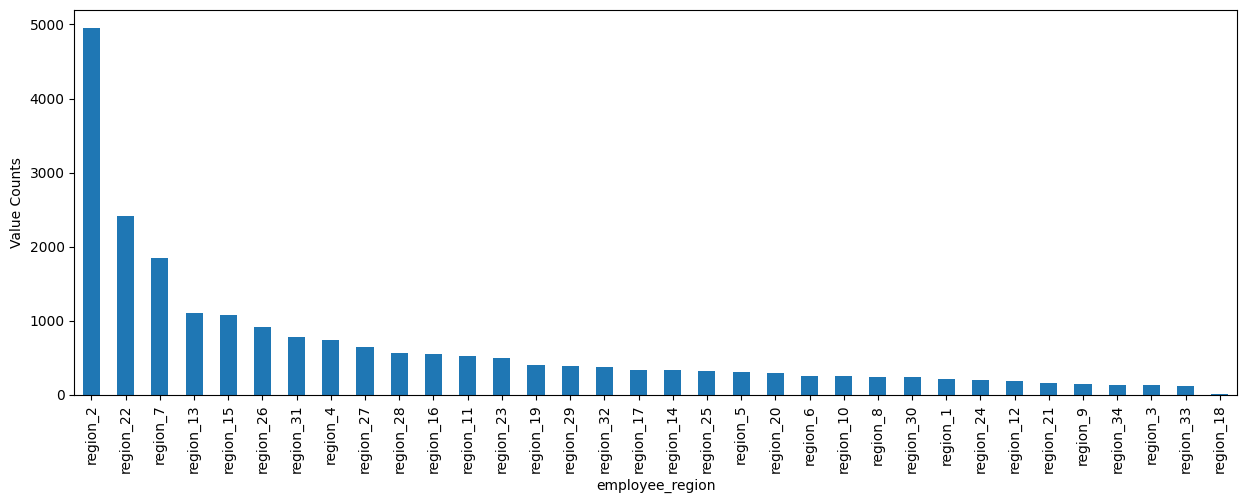

In [18]:
plt.figure(figsize=(15, 5))
region_value_counts.plot(kind='bar')
plt.ylabel('Value Counts')
plt.show()

- The 'region_2' has the highest count of employees, suggesting that this region has the largest employee base within the organization.
- The counts for other regions vary, with 'region_22', 'region_7', and 'region_15' having more employees than the rest but still significantly fewer than 'region_2'.
- The remaining regions have progressively fewer employees, with some regions having very few employees in comparison to 'region_2'.

- The organization may need to focus more HR resources and development programs in 'region_2', given its larger workforce.
- The regions with fewer employees might be areas of potential expansion or may require different management strategies due to their smaller size.

### Variable 5: employee_gender

In [19]:
gender_value_counts = df['employee_gender'].value_counts()

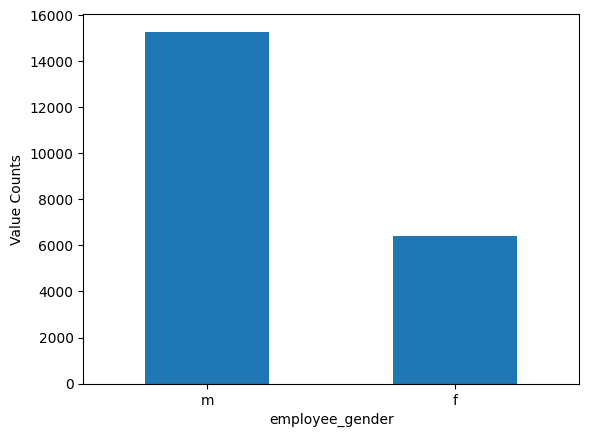

In [20]:
gender_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There are significantly more male employees ('m') than female employees ('f') in this dataset.
- The count of male employees exceeds 14000, while the count of female employees is just over 8000.

- There is a notable gender imbalance in the workforce represented in TFI. This could reflect the hiring practices or the nature of the company.

### Variable 6: employee_recruitment_channel

In [21]:
recruitment_value_counts = df['employee_recruitment_channel'].value_counts()

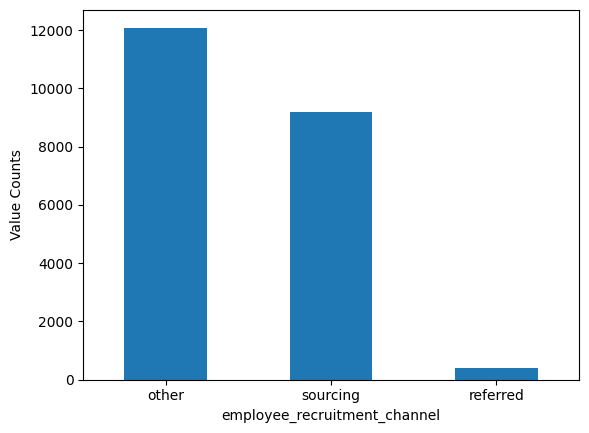

In [22]:
recruitment_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The 'other' category has the highest count, suggesting that many employees were recruited through channels that are not explicitly labeled as 'sourcing' or 'referred'.
- 'Sourcing' is the next most common recruitment channel, with just slightly fewer counts than 'other'.
- The 'referred' category has the lowest count among the three, indicating that fewer employees were hired through referrals compared to other methods.

- The organization uses a variety of recruitment channels, with a significant portion coming from unspecified sources ('other'). These could include online job postings, career fairs, or direct applications to the company.

### Variable 7: no_of_trainings_of_employee

In [23]:
trainings_value_counts = df['no_of_trainings_of_employee'].value_counts()

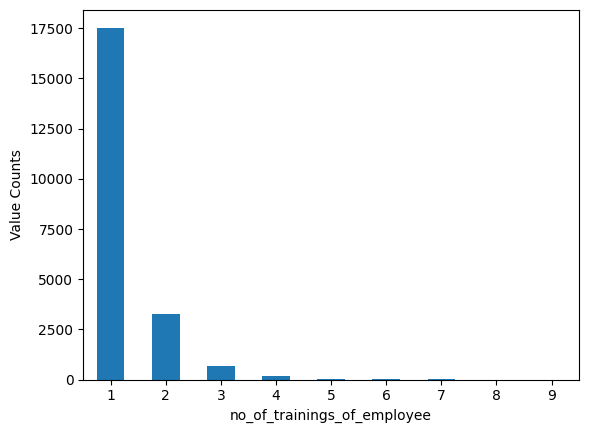

In [24]:
trainings_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A vast majority of employees have attended only one training session, as evidenced by the first bar's height, which far exceeds that of the others.
- There is a steep decline in the number of employees who have attended two training sessions, and an even more pronounced drop for those who have attended three.
- Very few employees have attended more than three training sessions, with the numbers becoming increasingly smaller for higher counts of training attendance.

- The organization might have a policy or culture that encourages or requires all employees to undergo at least one training session.

### Variable 8: employee_age

In [25]:
age_value_counts = df['employee_age'].value_counts()

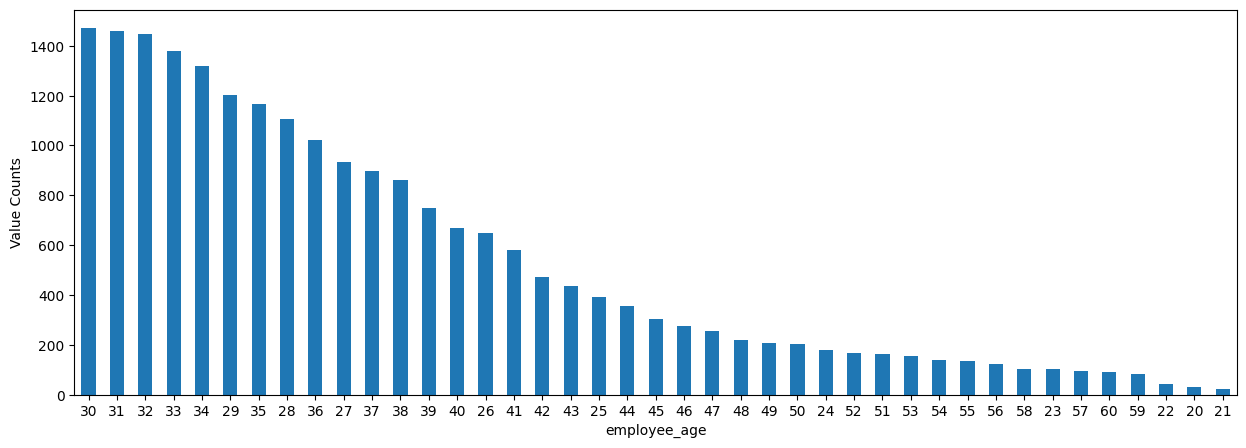

In [26]:
plt.figure(figsize=(15,5))
age_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The workforce is predominantly in the younger age brackets, with the highest count of employees around the age of 30.
- The number of employees gradually decreases with increasing age. This is indicative of a typical age distribution in many organizations, where younger employees outnumber their older counterparts.
- There is a noticeable tapering off as age increases, with significantly fewer employees in the late 50s and early 60s.
- The chart suggests that the organization might have a relatively young workforce, which could be reflective of recent hiring trends, the nature of the industry, or the fact that employees may tend to move on or retire around a certain age.- 

### Variable 9: employee_length_of_service

In [27]:
service_value_counts = df['employee_length_of_service'].value_counts()

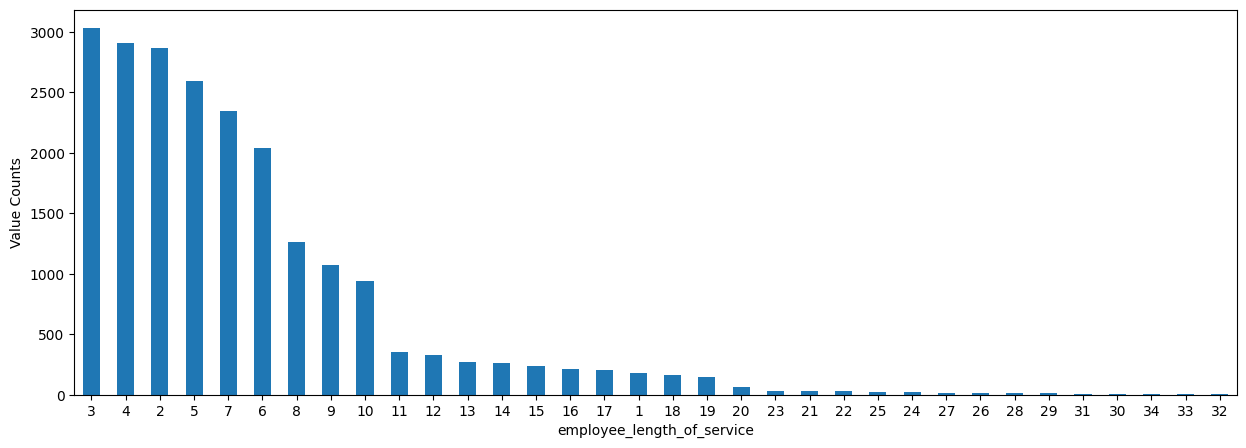

In [28]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There is a high number of employees with a short tenure, particularly those with 3 to 5 years of service.
- The number of employees decreases as the length of service increases, which is a common pattern in many organizations.
- There is a particularly sharp decrease after the first few years, indicating that either a lot of hiring has been done in recent years, or there is a high turnover rate within the first few years of service.
- Very few employees have extremely long tenures (over 20 years), which could suggest a relatively young organization, recent expansion, or few opportunities or incentives for long-term career development within the company.

In [29]:
#employees having length of service for more than 11 years, labelling them as 'LoS More Than 11' so that all the different data types are labelled as one.
def more_than_10(value):
    if value > 10:
        return 'LoS More Than 11'
    else:
        return value  # or '10 or Less' or any other label you want to use for values 10 or below

# Apply the function to the 'length_of_service' column
df.loc[:,'employee_length_of_service'] = df['employee_length_of_service'].apply(more_than_10)

service_value_counts = df['employee_length_of_service'].value_counts()

C:\Users\ROG\AppData\Local\Temp\ipykernel_24512\1990593779.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[5 4 9 ... 7 4 5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:,'employee_length_of_service'] = df['employee_length_of_service'].apply(more_than_10)


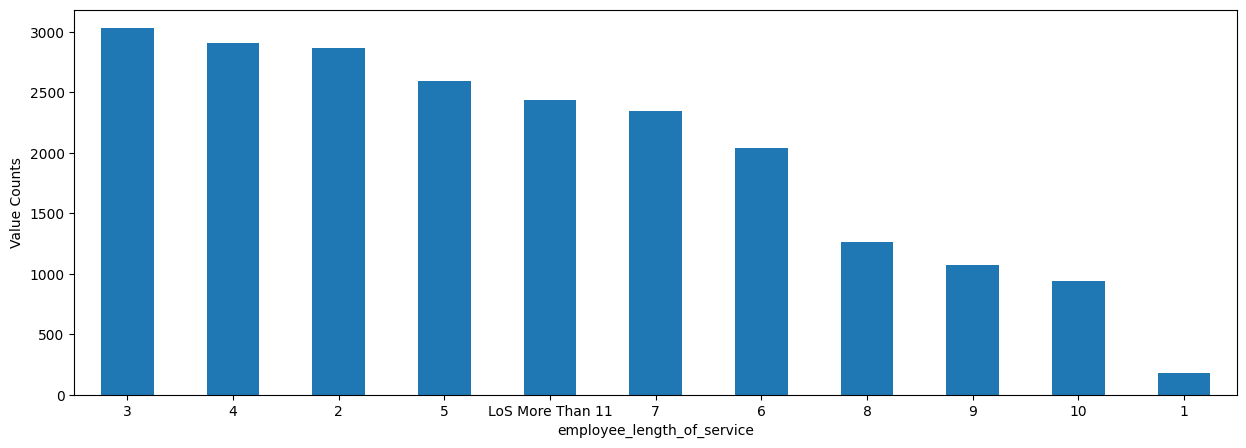

In [30]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

The category labeled "LoS More Than 11" is included, indicating that all employees with more than 11 years of service are grouped together in this bar. 

### Variable 10: employee_awards_won

In [31]:
awards_value_counts = df['employee_awards_won'].value_counts()

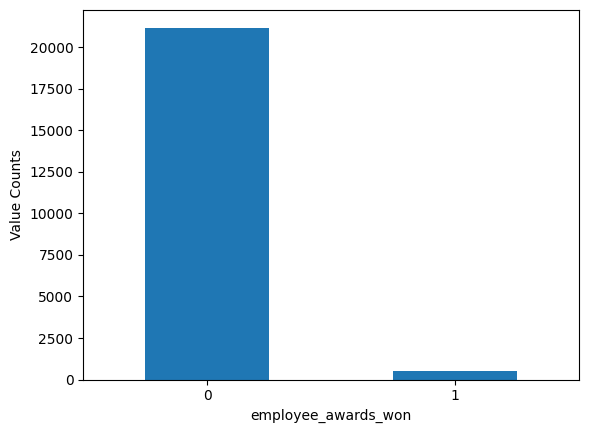

In [32]:
awards_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A large majority of employees (indicated by the bar labeled '0') have not won any awards.
- A relatively small number of employees (indicated by the bar labeled '1') have won awards.

- Awards may be given out selectively for exceptional performance or achievements, hence only a small number of employees have received them.
- The criteria for winning awards within this organization might be stringent, making it an accomplishment that few achieve.

### Variable 11: employee_avg_trainig_score

In [33]:
#checking out the distribution of values
counts = df['employee_avg_training_score'].value_counts()

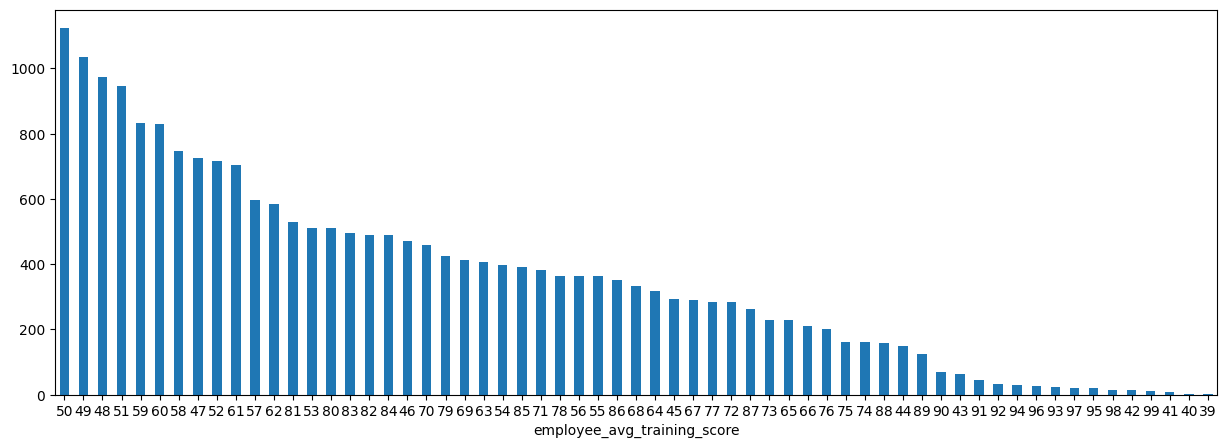

In [34]:
plt.figure(figsize=(15,5))
counts.plot(kind='bar', rot=0)
plt.show()

### Target Variable: employee_met_KPI > 80%

In [35]:
kpi_value_counts = df['employee_met_KPI > 80%'].value_counts()

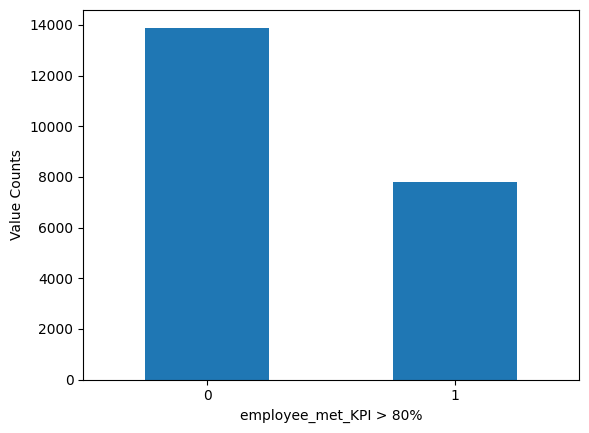

In [36]:
kpi_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The number of employees who did not meet the KPI (indicated by '0') is higher than those who did (indicated by '1').
- There are over 14000 instances of employees not meeting the KPI and around 8000 instances where employees met the KPI.

- The company may need to explore why a large proportion of employees are not meeting the KPI and implement training or development programs to support them.
- The KPI set at 80% might be too high, and the company could consider evaluating the KPI thresholds to ensure they are realistic and achievable.